<a href="https://colab.research.google.com/github/Devtekwani09/Stock-trend-prediction-using-ML/blob/master/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime

In [ ]:
import yfinance as yf

# Create a ticker object for AAPL
aapl = yf.Ticker("AAPL")

# Specify the start date as '2010-01-01'
start_date = "2010-01-01"

# Fetch historical data for AAPL starting from '2010-01-01'
df = aapl.history(period="max", start=start_date)

# Display the first few rows of the DataFrame
df.head()




Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.469950  6.502386  6.438121  6.487533  493729600   
2010-01-05 00:00:00-05:00  6.505420  6.535431  6.464495  6.498751  601904800   
2010-01-06 00:00:00-05:00  6.498750  6.524517  6.388709  6.395379  552160000   
2010-01-07 00:00:00-05:00  6.419023  6.426602  6.337175  6.383555  477131200   
2010-01-08 00:00:00-05:00  6.375069  6.426603  6.337480  6.425997  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0

In [ ]:
df.tail()

Open        High         Low       Close  \
Date                                                                        
2023-09-01 00:00:00-04:00  189.490005  189.919998  188.279999  189.460007   
2023-09-05 00:00:00-04:00  188.279999  189.979996  187.610001  189.699997   
2023-09-06 00:00:00-04:00  188.399994  188.850006  181.470001  182.910004   
2023-09-07 00:00:00-04:00  175.179993  178.210007  173.539993  177.559998   
2023-09-08 00:00:00-04:00  178.350006  180.240005  177.789993  178.179993   

                              Volume  Dividends  Stock Splits  
Date                                                           
2023-09-01 00:00:00-04:00   45732600        0.0           0.0  
2023-09-05 00:00:00-04:00   45280000        0.0           0.0  
2023-09-06 00:00:00-04:00   81755800        0.0           0.0  
2023-09-07 00:00:00-04:00  112488800        0.0           0.0  
2023-09-08 00:00:00-04:00   65551300        0.0           0.0

In [ ]:
df.shape

(3444, 7)

In [ ]:
df = df.reset_index()

In [ ]:
df = df.drop(['Date','Dividends','Stock Splits'], axis=1)

In [ ]:
df.head()

Open      High       Low     Close     Volume
0  6.469950  6.502386  6.438121  6.487533  493729600
1  6.505420  6.535431  6.464495  6.498751  601904800
2  6.498750  6.524517  6.388709  6.395379  552160000
3  6.419023  6.426602  6.337175  6.383555  477131200
4  6.375069  6.426603  6.337480  6.425997  447610800

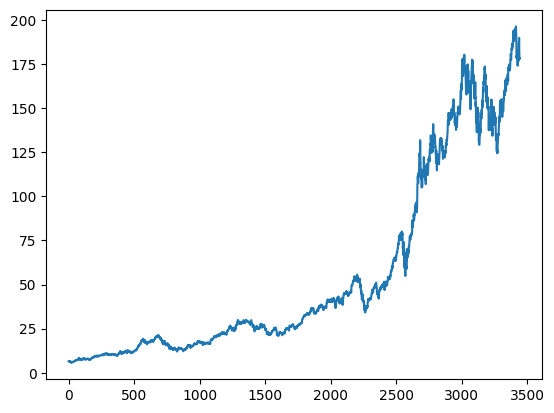

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3439    179.975759
3440    180.276126
3441    180.454142
3442    180.582149
3443    180.716156
Name: Close, Length: 3444, dtype: float64

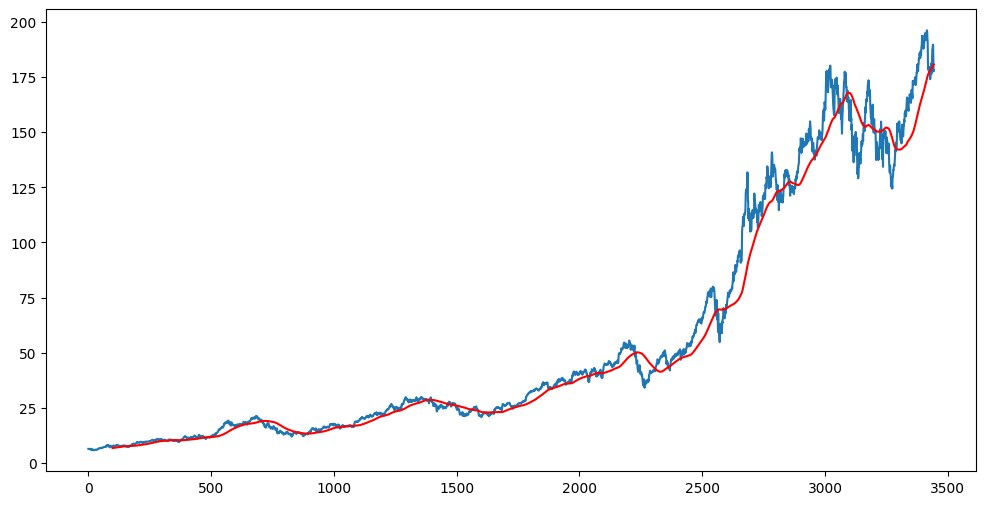

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, color = 'red')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3439    163.016129
3440    163.217616
3441    163.391376
3442    163.528778
3443    163.666442
Name: Close, Length: 3444, dtype: float64

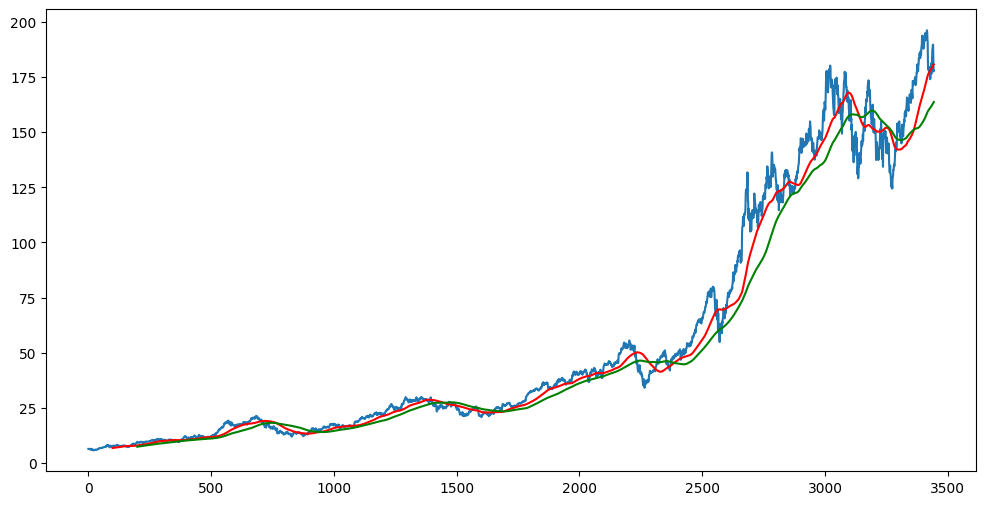

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, color = 'red')
plt.plot(ma200, color ='green')

In [ ]:
#spliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2410, 1)
(1034, 1)


In [ ]:
data_training.head()

Close
0  6.487533
1  6.498751
2  6.395379
3  6.383555
4  6.425997

In [ ]:
data_testing.head()

Close
2410  50.487694
2411  49.419472
2412  46.832470
2413  47.719028
2414  48.213173

In [ ]:
#scaling data from 0-1
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
print(data_training_array)

[[0.01338261]
 [0.01360813]
 [0.01153003]
 ...
 [0.90401093]
 [0.89962825]
 [0.92037249]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [ ]:
data_training_array.shape

(2410, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

In [ ]:
x_train

[array([[1.33826106e-02],
        [1.36081290e-02],
        [1.15300254e-02],
        [1.12923425e-02],
        [1.21455472e-02],
        [1.10059343e-02],
        [9.54944904e-03],
        [1.13350094e-02],
        [1.05915252e-02],
        [8.45860929e-03],
        [1.40103352e-02],
        [1.19931789e-02],
        [9.76273584e-03],
        [3.47363192e-03],
        [6.71568710e-03],
        [8.46468677e-03],
        [9.64693788e-03],
        [4.41212259e-03],
        [6.05830364e-06],
        [1.63320171e-03],
        [2.32181611e-03],
        [4.37557146e-03],
        [0.00000000e+00],
        [2.07810359e-03],
        [1.26145001e-03],
        [2.52296713e-03],
        [1.87088469e-03],
        [4.03427424e-03],
        [5.07638874e-03],
        [6.91681894e-03],
        [6.39881481e-03],
        [6.63036279e-03],
        [5.86252074e-03],
        [5.10073698e-03],
        [3.05312621e-03],
        [5.24703735e-03],
        [6.06363341e-03],
        [7.66026483e-03],
        [1.0

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2310, 100, 1)

In [ ]:
# ML model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
73/73 [==============================] - 29s 287ms/step - loss: 0.0337
Epoch 2/50
73/73 [==============================] - 23s 316ms/step - loss: 0.0068
Epoch 3/50
73/73 [==============================] - 22s 296ms/step - loss: 0.0070
Epoch 4/50
73/73 [==============================] - 23s 314ms/step - loss: 0.0060
Epoch 5/50
73/73 [==============================] - 23s 320ms/step - loss: 0.0052
Epoch 6/50
73/73 [==============================] - 25s 348ms/step - loss: 0.0044
Epoch 7/50
73/73 [==============================] - 25s 340ms/step - loss: 0.0047
Epoch 8/50
73/73 [==============================] - 21s 289ms/step - loss: 0.0046
Epoch 9/50
73/73 [==============================] - 23s 319ms/step - loss: 0.0040
Epoch 10/50
73/73 [==============================] - 21s 287ms/step - loss: 0.0045
Epoch 11/50
73/73 [==============================] - 23s 320ms/step - loss: 0.0042
Epoch 12/50
73/73 [==============================] - 21s 289ms/step - loss: 0.0034
Epoch 13/50
7

In [ ]:
data_testing.head()

Close
2410  50.487694
2411  49.419472
2412  46.832470
2413  47.719028
2414  48.213173

In [ ]:
data_training.tail(100)

Close
2310  43.168438
2311  43.653465
2312  43.846493
2313  44.333916
2314  44.910633
...         ...
2405  50.146164
2406  50.320564
2407  50.790482
2408  50.572472
2409  51.604362

[100 rows x 1 columns]

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df

Close
0      43.168438
1      43.653465
2      43.846493
3      44.333916
4      44.910633
...          ...
1129  189.460007
1130  189.699997
1131  182.910004
1132  177.559998
1133  178.179993

[1134 rows x 1 columns]

In [ ]:
input_data = scaler.fit_transform(final_df)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [ ]:
input_data

array([[0.00771843],
       [0.01086373],
       [0.01211548],
       ...,
       [0.91391389],
       [0.87922019],
       [0.88324073]])

In [ ]:
input_data.shape

(1134, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test.shape

(1034, 100, 1)

In [ ]:
y_test.shape

(1034,)

In [ ]:
# making predictions

y_predicted = model.predict(x_test)

33/33 [==============================] - 4s 85ms/step


In [ ]:
y_predicted.shape

(1034, 1)

In [ ]:
scaler.scale_

array([0.0064848])

In [ ]:
scale_factor = 1/0.0064848
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

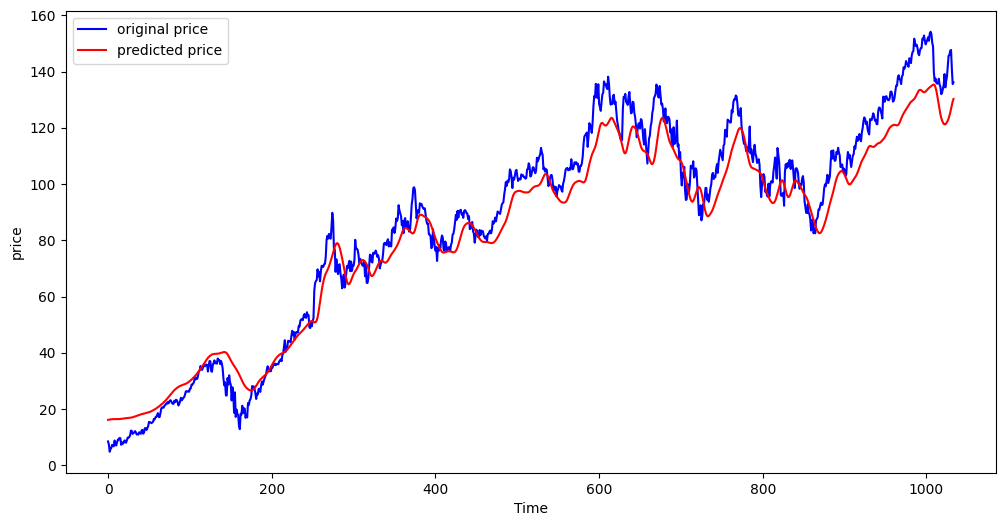

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'original price')
plt.plot(y_predicted, 'r', label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
